In [18]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Correcting the import statement for Matplotlib

In [19]:
# Import Dataset
dataset = pd.read_csv('Iris.csv')

In [20]:
# Check for missing values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [21]:
# Check Null Value
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [22]:
# Independent variable
X = dataset.drop(['Species'], axis=1)

In [23]:
# Dependent Variable
y = dataset['Species']

In [24]:
# Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # Changed test_size to 0.2 (20% test data)

In [25]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
# Importing Library for Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
# Predictions
y_pred = model.predict(X_test)

In [28]:
# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

Accuracy Score: 0.9666666666666667


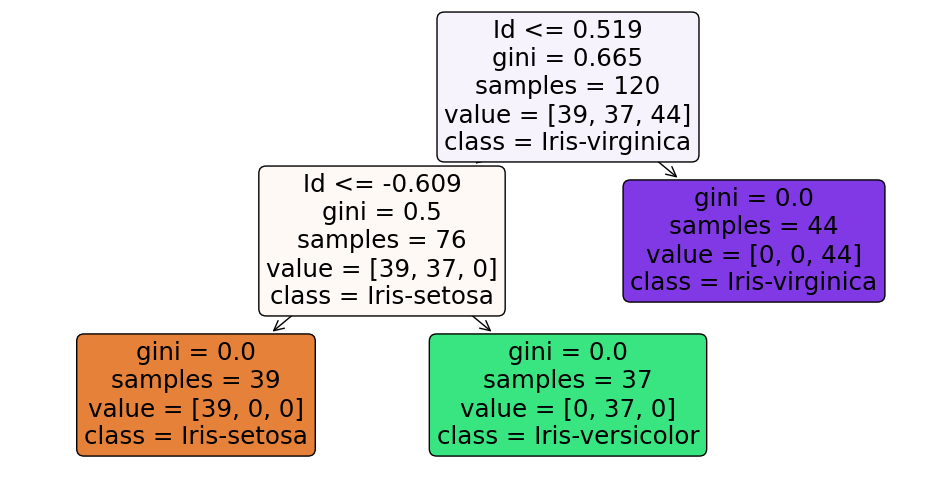

In [31]:
# Convert the array of class names to a list
class_names = list(dataset['Species'].unique())

# Visualize the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()
